UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Segunda avaliação - Atividade 4 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: FILIPE SOARES DONATO**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [9]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

In [10]:
pip install slycot

  Using cached slycot-0.4.0.0.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1418254 sha256=01eaa2cdde4765fd0803dc90ee10d79c3b2fbd779ebd481874e83c1c90d6814b
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built slycot


Engenheiros estão projetando o sistema de controle automático da velocidade $v$ de um novo modelo de um carro elétrico de massa $m=1600.0$ kg. Como apresentado na Figura 1, uma força $u$ pode ser exercida no veículo por meio do motor elétrico; e a força de atrito é $bv$, em que $b=0.61$ Ns/m é o coeficiente de atrito viscoso. Num plano horizontal, como apresentado no lado esquerdo da Figura 1, a força peso $mg$ é equilibrada pela força normal $N$ de mesma intensidade, em que $g = 9.81$ m/s$^2$ é a aceleração da gravidade. Num plano inclinado, com inclinação $\theta$, como apresentado no lado direito da Figura 1, a componente $mg \cos (\theta)$ da força peso é equilibrada pela força normal $N$ de mesma intensidade, mas há também uma componente $w = mg \sin (\theta)$ da força peso na mesma direção e sentido contrário ao movimento do carro. Considere esta componente $w$ uma entrada de perturbação no sistema de controle de velocidade do carro.

(a) (1.5 pontos) A partir do sistema de controle projetado na Segunda avaliação - Atividade 3, apresente os resultados de uma simulação em que a entrada de referência é igual $27.777$ m/s e: 

*   de 0s a 20s o carro está num plano horizontal;
*   de 20s a 40s o carro está num plano inclinado de inclinação $\theta = 10.0^o$.

(b) (1.0 ponto) Quais são as suas conclusões sobre os regimes transitório e permanente nos resultados de simulação do item (a)? As especificações do sistema de controle são atendidas?

Especificações:


*   Tanto num plano horizontal quanto num plano inclinado, deve ser nulo em regime permanente o erro da velocidade em relação a uma entrada de referência $r$.
*   A duração do regime transitório deve ser menor que 5s.



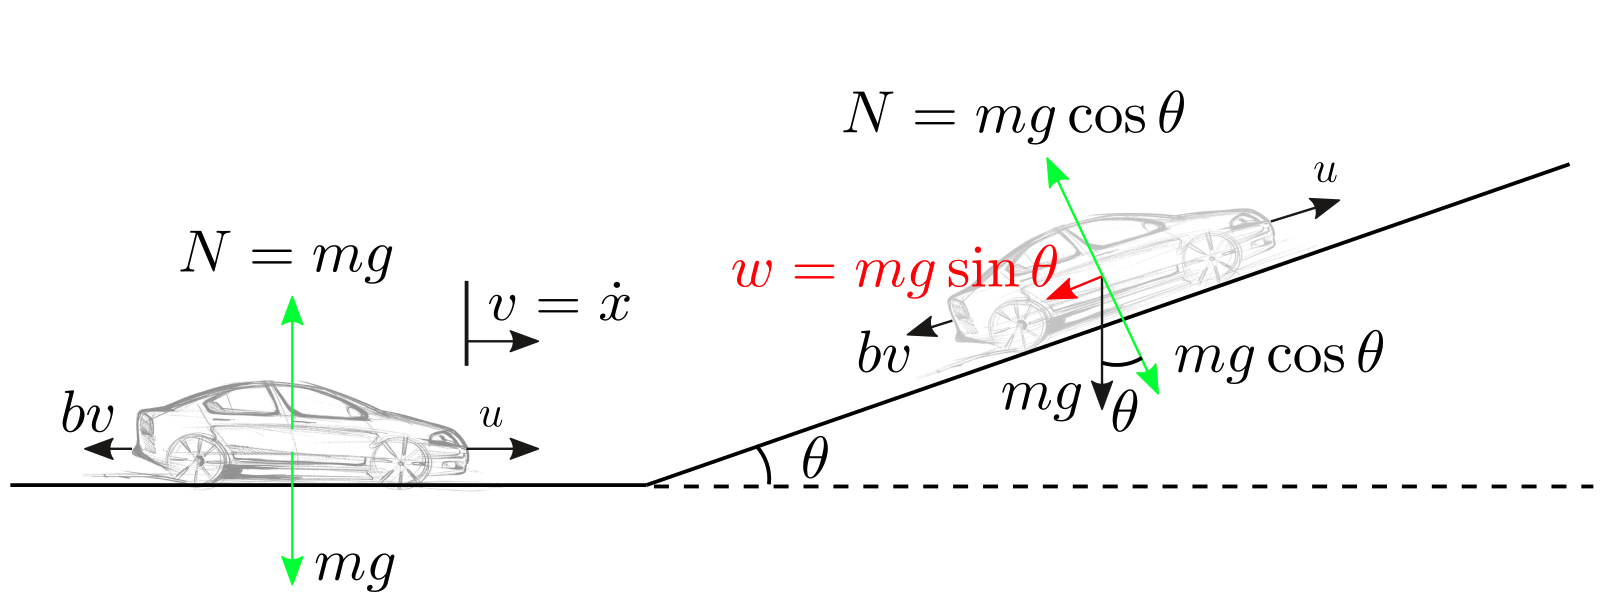

Figura 1: carro num plano horizontal (esquerda), e num plano inclinado (direita).

Resposta

In [ ]:
pip install slycot


  0.000625
-------------
s + 0.0003812


1.049e+04 s + 1.049e+04
-----------------------
           s

A função de malha fechada é:  
   6.556 s + 6.557
---------------------
s^2 + 6.557 s + 6.557

A função do erro pra saida é:  
     0.000625 s
---------------------
s^2 + 6.557 s + 6.557



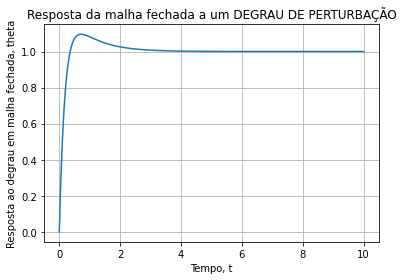


 Tempo de subida: 0.2585226239065391

 Tempo de pico: 0.7238633469383094

 Pico: 1.0957650222672224

 Sobre-sinal (%): 9.576502226722239

 Tempo de acomodação: 2.7661920757999683

 Valor de regime permanente: 1.0

Input 1 to output 1:
   6.556 s + 6.557
---------------------
s^2 + 6.557 s + 6.557

Input 2 to output 1:
     0.000625 s
---------------------
s^2 + 6.557 s + 6.557



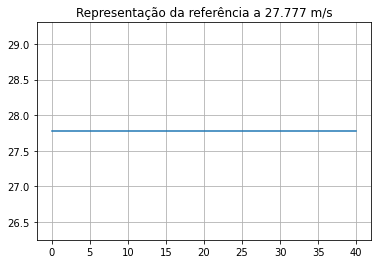

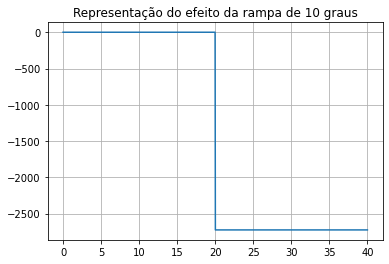

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


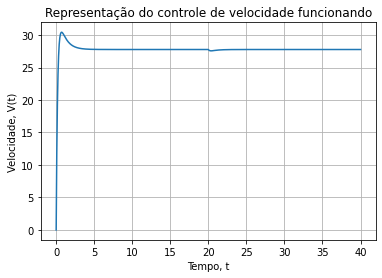

In [17]:
#Resposta
import numpy as np
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt

#N -     Força Normal onde:       N = m * g
#P -     Força Peso que é o inverso da Normal: P = -N
#U -     Força exercida no veículo por meio de um motor elétrico
#x -     Posição
#v -     Velocidade
#Fa -    Força de atrito onde:   FA = b*v
#O -     Ângulo TETA da inclinação do plano
#R -     Entrada de referência do sistema

#Criar a variavel 's' pra usar na função de transferência
s = tf('s')

#Parâmetros
m = 1600  #Massa
b = 0.61  #Coeficiente de atrito viscoso
g = 9.81  #Gravidade

kp = 10490.16
ki = 10491.8

H = (1/m) / (s+(b/m))
print(H)

G = kp + (ki/s)
print(G)

FTMF = feedback(G*H, 1, sign=-1)
print('A função de malha fechada é: ', FTMF)

WY = feedback(H, -G, sign=1)
print('A função do erro pra saida é: ', WY)

y,t = step(FTMF, T=10)
plt.figure(1)
plt.plot(t,y) 
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao degrau em malha fechada, theta')
plt.title('Resposta da malha fechada a um DEGRAU DE PERTURBAÇÃO')
plt.grid(True)
plt.show()

#Usando a função stepinfo, determine se o tempo de acomodação da saída 
#para um degrau na perturbação é menor ou igual a  10  segundos
S = stepinfo(FTMF, SettlingTimeThreshold=0.01)
#Se quiser imprimir a linha com resultado em inglês digita: print(S)
print('\n Tempo de subida:', S["RiseTime"])
print('\n Tempo de pico:', S["PeakTime"])
print('\n Pico:', S["Peak"])
print('\n Sobre-sinal (%):', S["Overshoot"])
print('\n Tempo de acomodação:', S["SettlingTime"])
print('\n Valor de regime permanente:', S["SteadyStateValue"])

#Vamos aplicar um impulso agora na perturbação
#y,t = impulse(FTMF, T=10)
#plt.figure(2)
#plt.plot(t,y) 
#plt.xlabel('Tempo, t') 
#plt.ylabel('Resposta ao degrau em malha fechada, theta')
#plt.title('Resposta da malha fechada a um IMPULSO DE PERTURBAÇÃO')
#plt.grid(True)
#plt.show()

#-----------------------------------------------------------------------
#LETRA A
# Criar a função de transferência de um sistema com duas entradas e uma saída
num = [[[6.556, 6.557] , [0.000625, 0]]]
den = [[[1, 6.557, 6.557], [1, 6.557, 6.557]]]
X = tf(num,den)
print(X) #Só pra ver se escreveu corretamente

Er = 27.777             #Entrada de referência de 27.777m/s
Ew = -m*g*sin(0.174533)  #Passou 10 graus para RADIANOS

t  = np.linspace(0, 40, num =1000)
t1 = np.linspace(0, 20, num =500, endpoint = False)
t2 = np.linspace(20, 40, num =500)

t3 = np.ones(np.shape(t))

w1 = np.zeros(np.shape(t1))
w2 = np.ones(np.shape(t2))
w3 = np.concatenate((w1, w2), axis=0, out=None)

R = np.multiply(t3, Er)
W = np.multiply(w3, Ew)
#print(W) #se quiser conferir algum vetor acima

#Pra ver se tá correta a ideia de 27.777m/s
plt.figure(2)
plt.plot(t,R)
plt.title('Representação da referência a 27.777 m/s')
plt.grid(True)
plt.show()

#Pra ver se tá correta a ideia de criar uma rampa de 10 graus
plt.figure(3)
plt.plot(t,W)
plt.title('Representação do efeito da rampa de 10 graus')
plt.grid(True)
plt.show()

y,t,x = lsim(X, np.transpose([R, W]), t)
plt.figure(4)
plt.plot(t,y) 
plt.title('Representação do controle de velocidade funcionando')
plt.xlabel('Tempo, t') 
plt.ylabel('Velocidade, V(t)')
plt.grid(True)
plt.show()

***B - As suas conclusões sobre os regimes transitório e permanente nos resultados de simulação do item (a)***



No regime transitório consegui projetar para que em menos de 5 segundos a velocidade inicial se estabilizasse. Depois no regime permante ficou em 27.777m/s.

Quando chega em 20 segundos o veículo pega uma rampa vertical, é esperado que a velocidade do carro diminua, daí o controlador vai corrigir a velocidade e voltar para 27.777m/s.

Portanto, as especificações do sistema de controle foram atendidas!

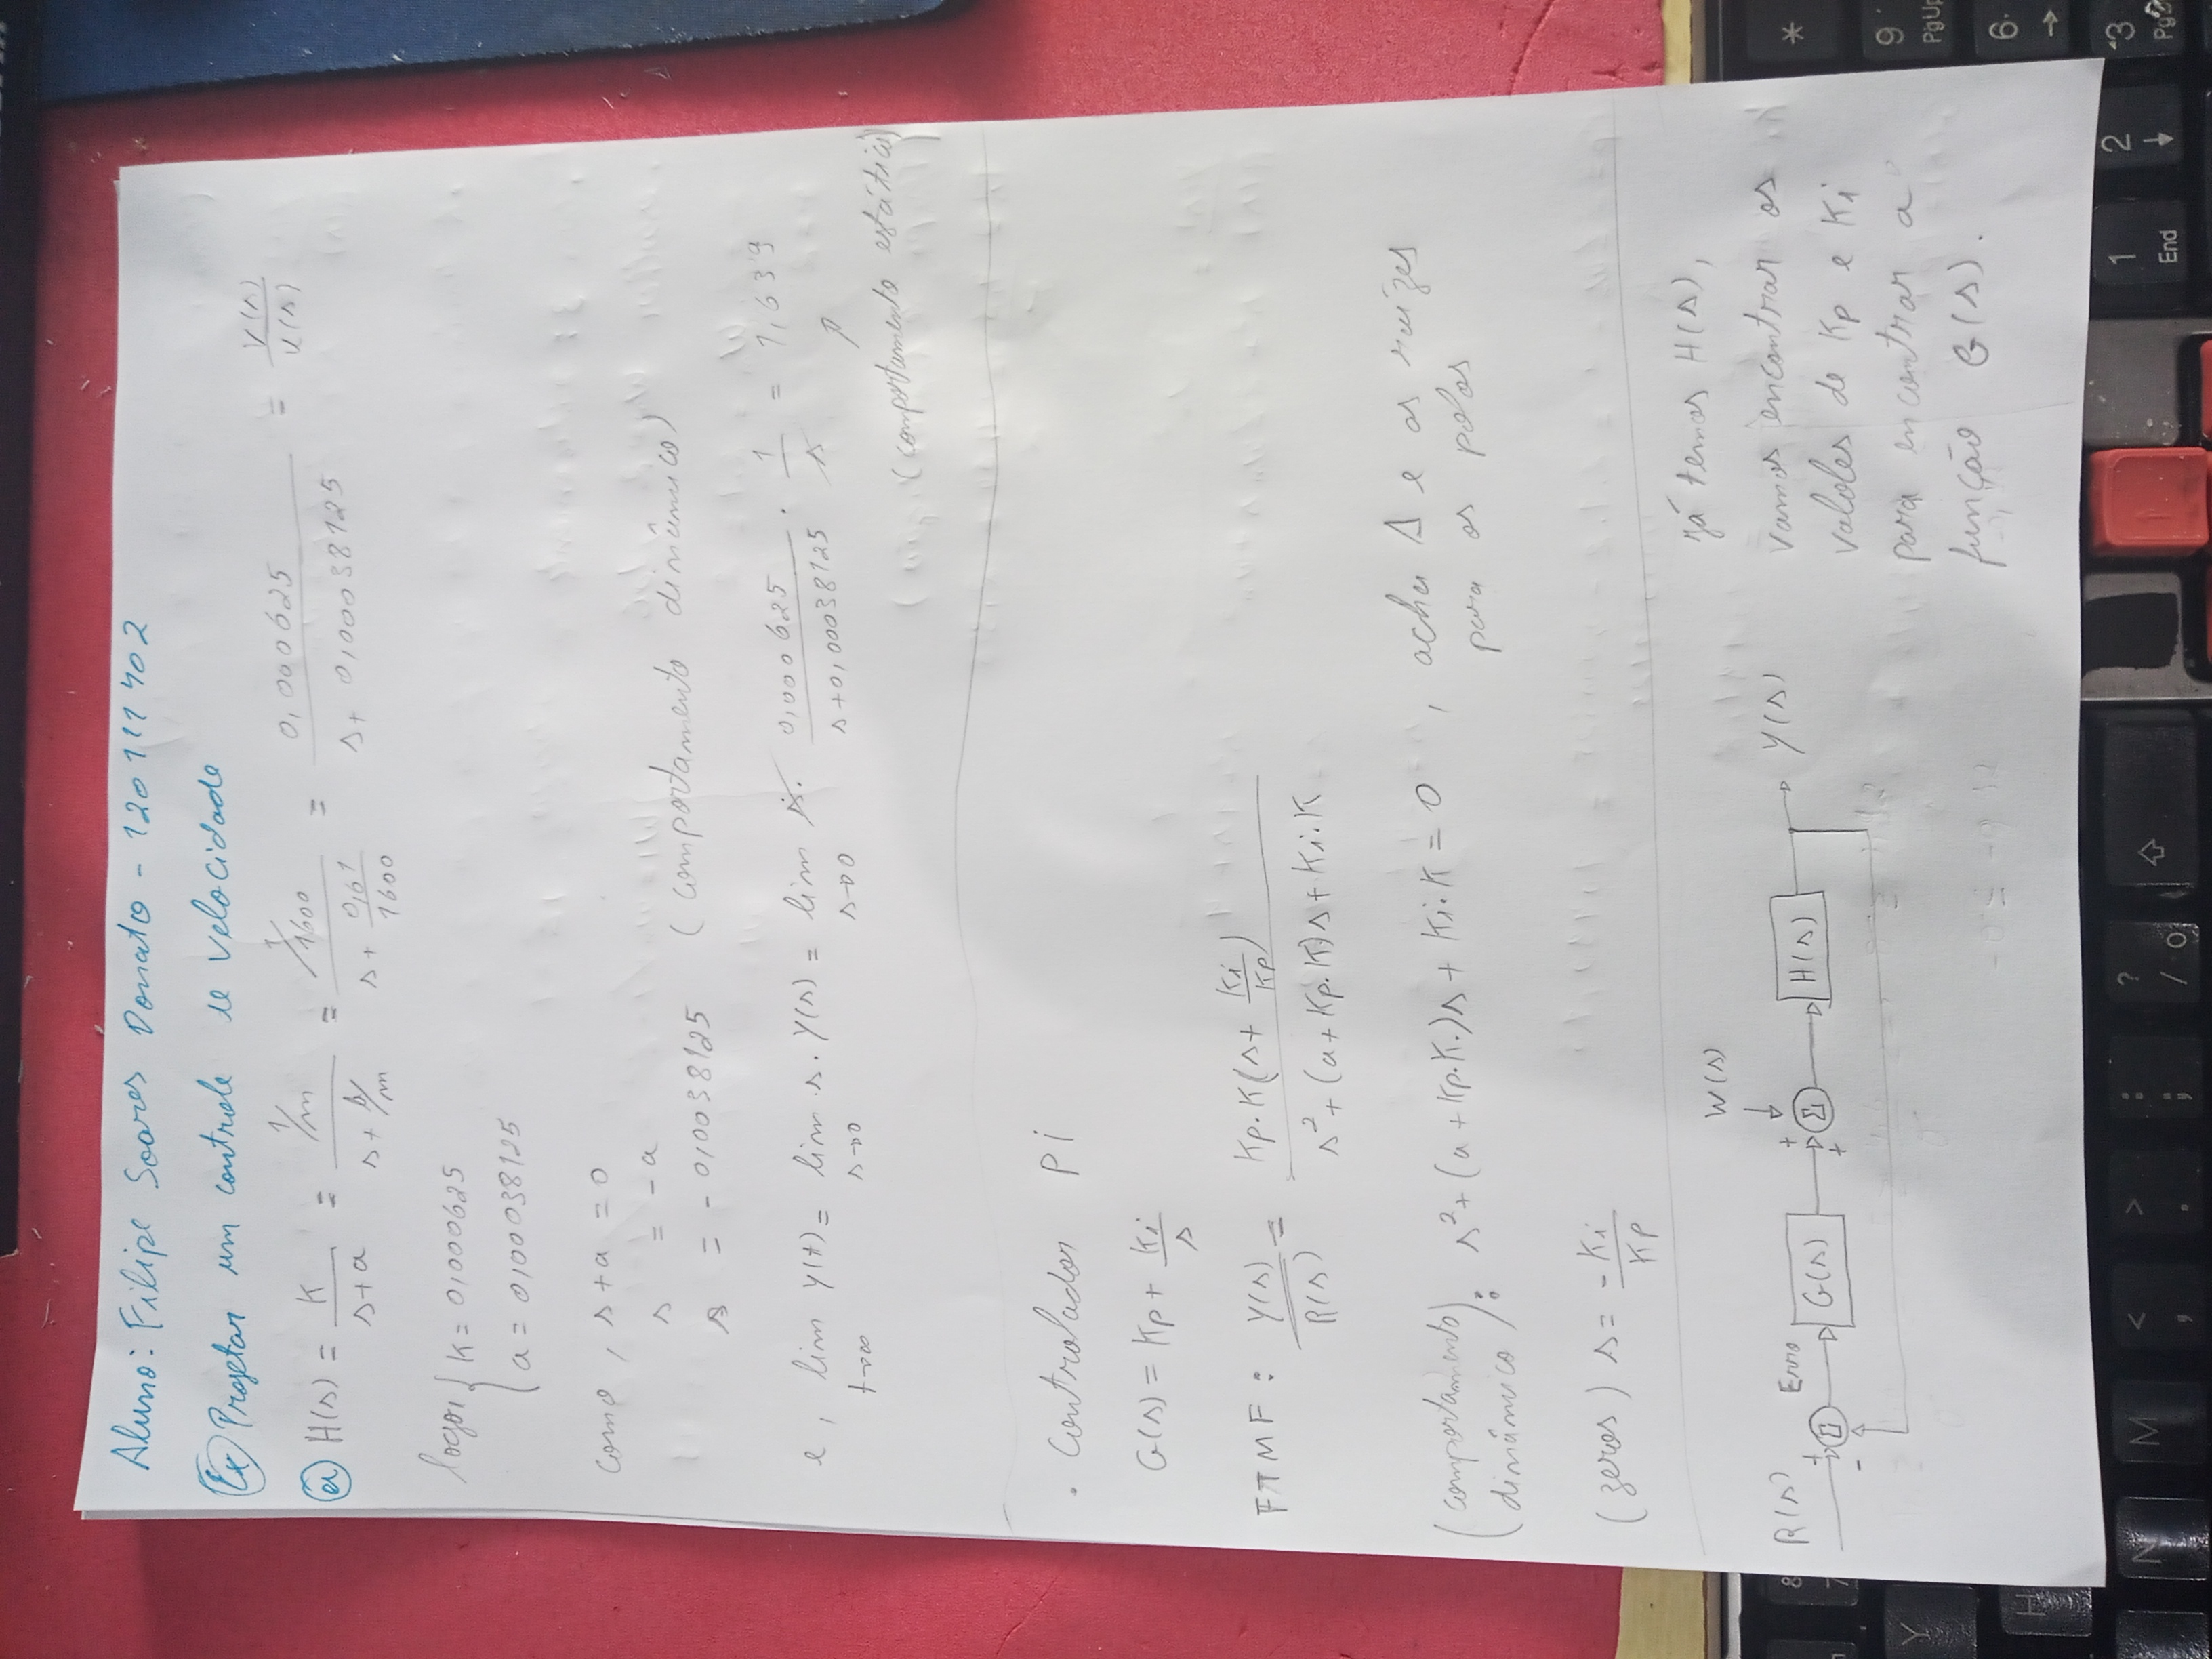

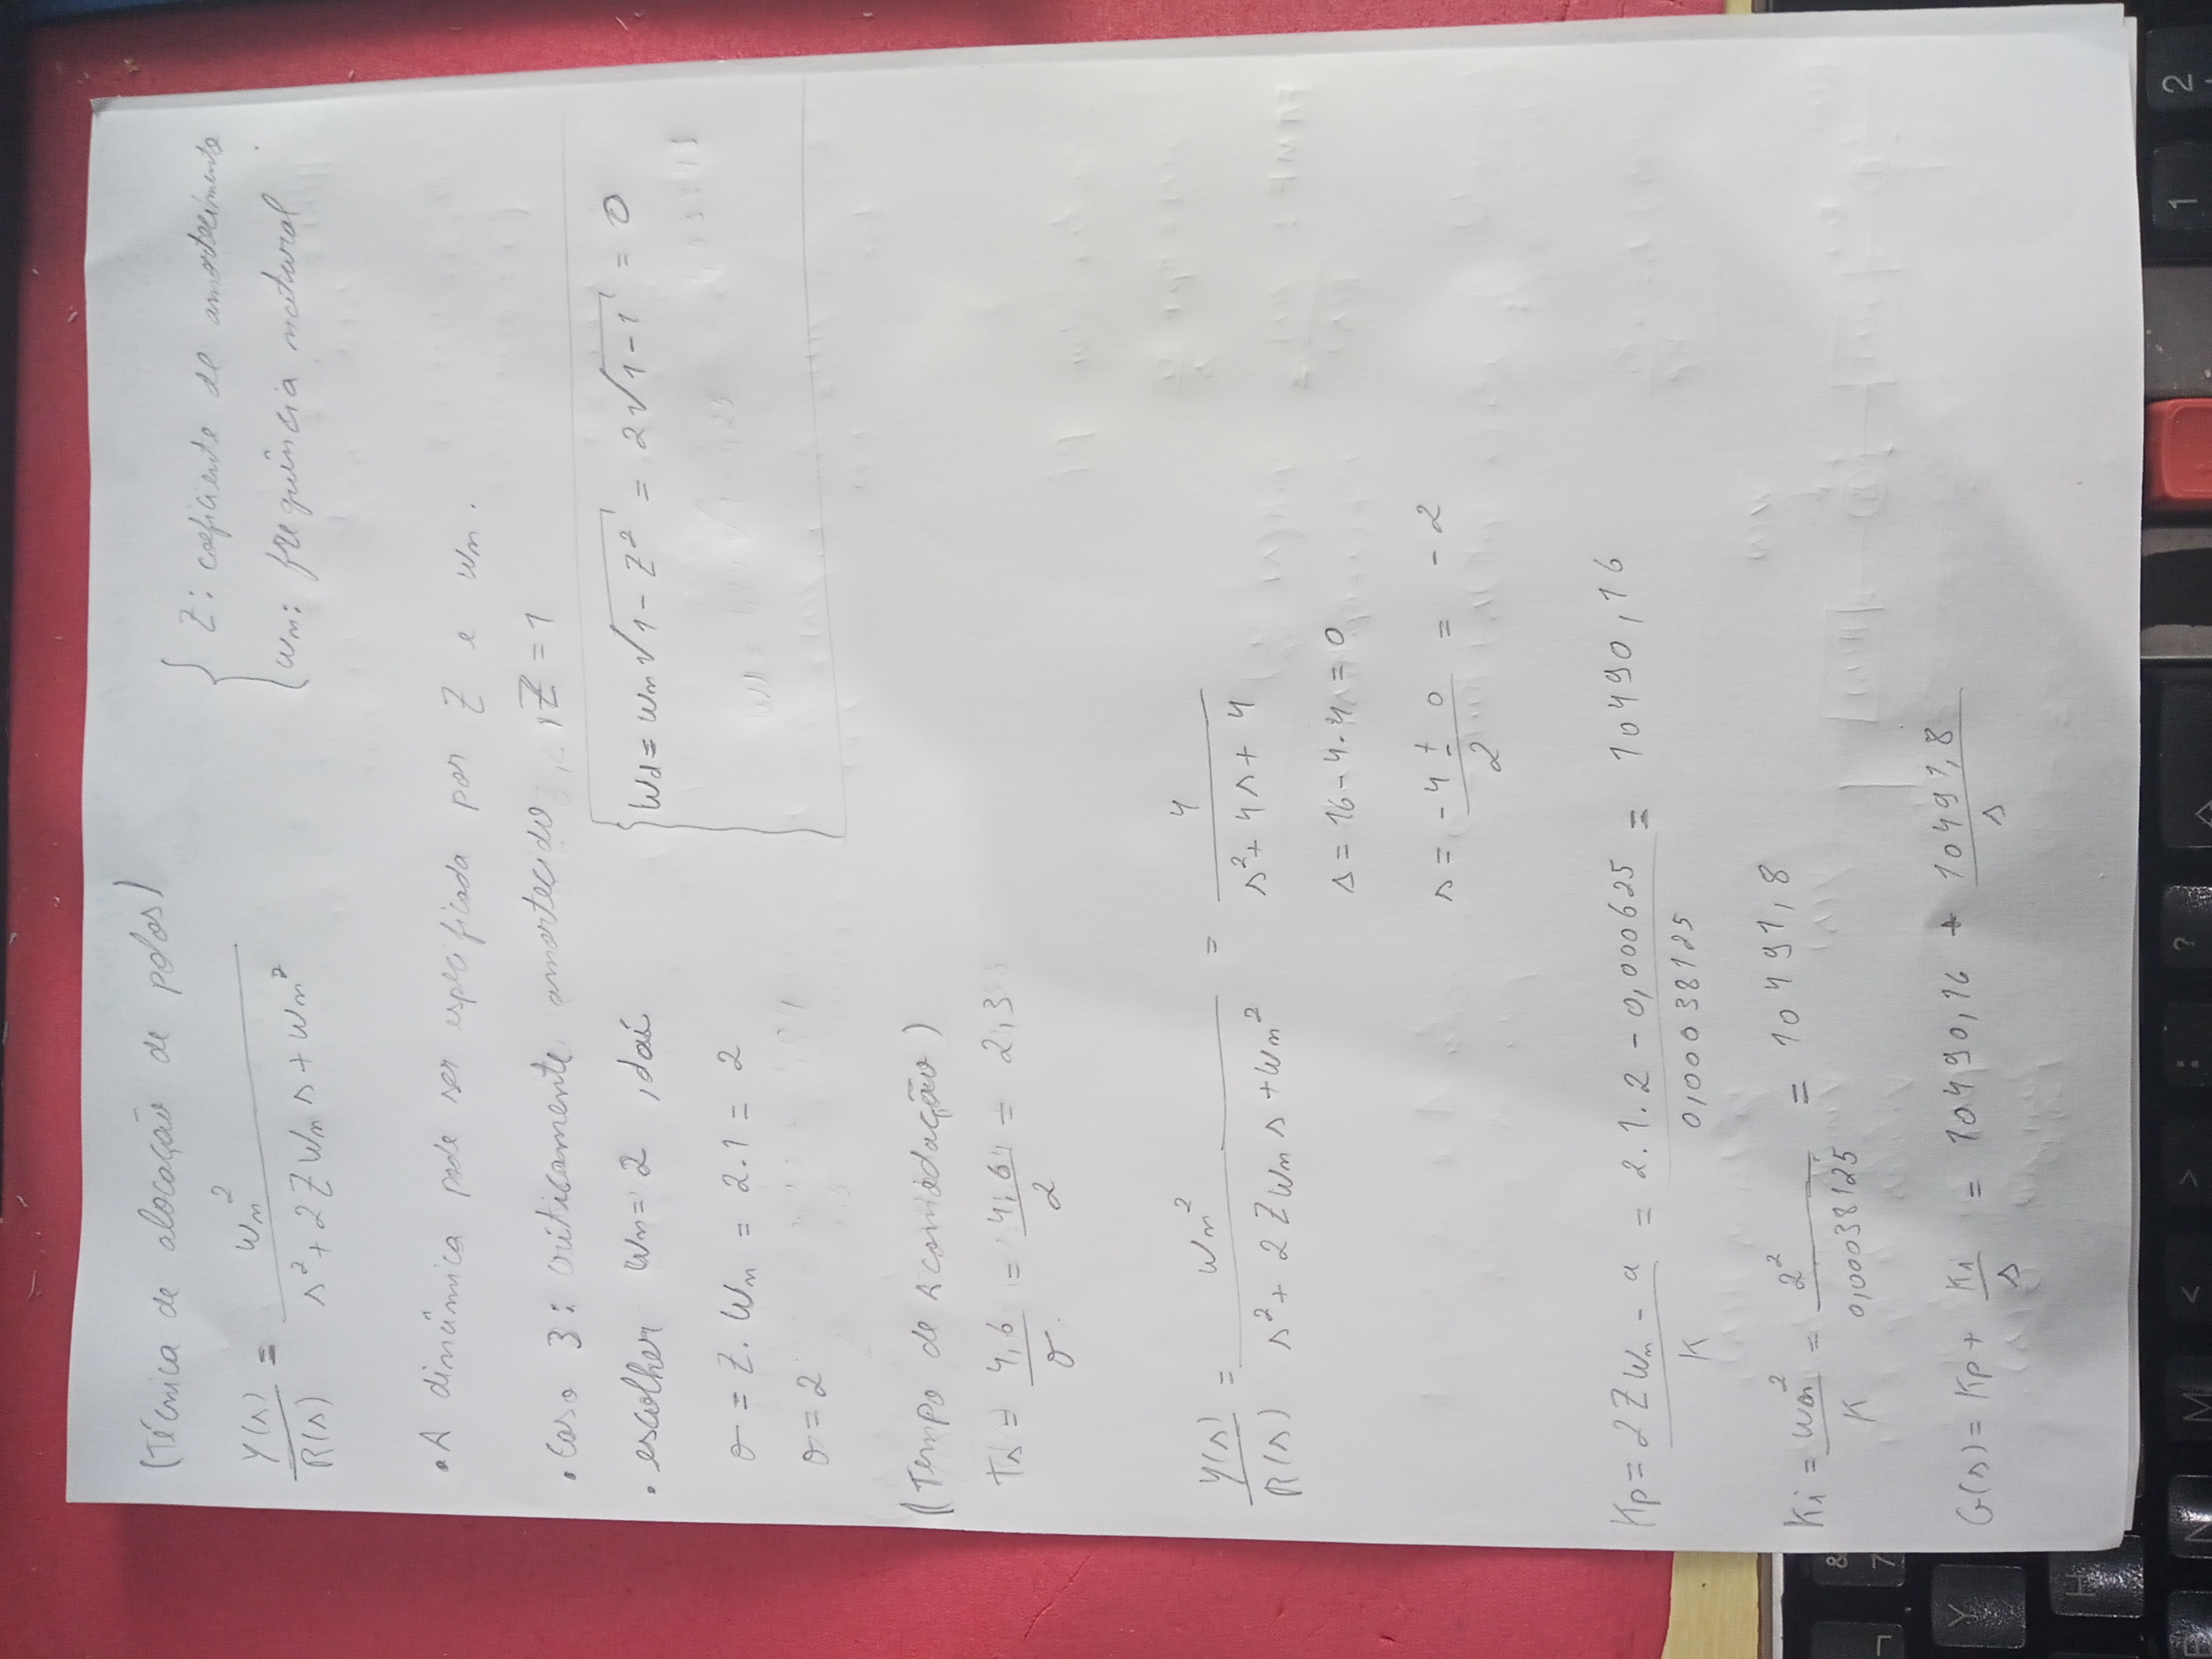